<a href="https://colab.research.google.com/github/dhwanil1907/dhwanil1907/blob/main/CSU_SBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data we used was a large and rich dataset from the US Small Business Administration (SBA),We propose to use logistic regression to predict whether the bank loan should be rejected or approved.
Project Title: SBA Loan Approval Analysis & Prediction

**Team Member: Santosh Ravindrabharathy and Dhwanil Ranpura**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Preprocessing**



In [ ]:
# Basic Libraries:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import pandas_profiling as pp
import datetime
import math
from datetime import date
from scipy import stats
import gc
import time

#Feature Selection:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#Balancing the Dataset:
from imblearn.pipeline import Pipeline

#Model Evaluation:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score,auc,roc_curve,roc_auc_score, log_loss, make_scorer, precision_recall_curve

#Modeling Algoritms:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from xgboost import XGBClassifier



In [ ]:
import pandas as pd

file = '/content/drive/MyDrive/SBAnational.csv'
data = pd.read_csv(file)
data.head()

<ipython-input-102-86d4fdc57ebe>:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

## **DATA CLEANING**

Check Duplicates

In [ ]:
data.duplicated().sum()

0

Check Missing Values

In [ ]:
data.isnull().sum()


,0
LoanNr_ChkDgt,0
Name,14
City,30
State,14
Zip,0
Bank,1559
BankState,1566
NAICS,0
ApprovalDate,0
ApprovalFY,0


In [ ]:
data.dropna(subset=['MIS_Status'], inplace = True) # drop it because it is the label



For Variable names like "Name", "City", "State", ""Bank", "BankState", "NewExist" ,"RevLineCr", "LowDoc", and "DisbursementDate", number of missing values are relatively small so that we can choose the drop the rows with missing values in this features.

In [ ]:
data.dropna(subset= ["Name", "City", "State", "Bank", "BankState", "NewExist", "RevLineCr", "LowDoc", "DisbursementDate"], inplace = True)


In [ ]:
data['ChgOffDate'].isnull().sum() # it is highly correlated to the label


725369

In [ ]:
data['MIS_Status'].value_counts()

,count
MIS_Status,
P I F,730199
CHGOFF,156041


In [ ]:
data = data.drop('ChgOffDate', axis=1)



In [ ]:
data.isnull().sum()

,0
LoanNr_ChkDgt,0
Name,0
City,0
State,0
Zip,0
Bank,0
BankState,0
NAICS,0
ApprovalDate,0
ApprovalFY,0


In [ ]:
data[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']] = data[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].applymap(lambda x : x.strip().replace('$','').replace(',',''))
data.head()

<ipython-input-112-a1bb5f2365be>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']] = data[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].applymap(lambda x : x.strip().replace('$','').replace(',',''))


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,0,N,Y,28-Feb-99,60000.00,0.00,P I F,0.00,60000.00,48000.00
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,0,N,Y,31-May-97,40000.00,0.00,P I F,0.00,40000.00,32000.00
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,0,N,N,31-Dec-97,287000.00,0.00,P I F,0.00,287000.00,215250.00
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,0,N,Y,30-Jun-97,35000.00,0.00,P I F,0.00,35000.00,28000.00
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,0,N,N,14-May-97,229000.00,0.00,P I F,0.00,229000.00,229000.00


In [ ]:
data = data.drop(columns = ["ApprovalDate", "ApprovalFY", "DisbursementDate", "ChgOffPrinGr", "BalanceGross"], axis = 1) # drop it because they are coming in with a dollar sign and comma
data = data.drop(columns = ["LoanNr_ChkDgt", "Name"], axis = 1) # drop the variable names that are not useful towards the prediction
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 886240 entries, 0 to 899163
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   City               886240 non-null  object 
 1   State              886240 non-null  object 
 2   Zip                886240 non-null  int64  
 3   Bank               886240 non-null  object 
 4   BankState          886240 non-null  object 
 5   NAICS              886240 non-null  int64  
 6   Term               886240 non-null  int64  
 7   NoEmp              886240 non-null  int64  
 8   NewExist           886240 non-null  float64
 9   CreateJob          886240 non-null  int64  
 10  RetainedJob        886240 non-null  int64  
 11  FranchiseCode      886240 non-null  int64  
 12  UrbanRural         886240 non-null  int64  
 13  RevLineCr          886240 non-null  object 
 14  LowDoc             886240 non-null  object 
 15  DisbursementGross  886240 non-null  object 
 16  MIS_Sta

In [ ]:
data['NewExist'].value_counts() # turn it into string type


,count
NewExist,
1.0,636139
2.0,249080
0.0,1021


In [ ]:
data = data[data['NewExist'] != 0] # filters the data to exclude the rows where NewExist equals 0
data['NewExist'].value_counts()

,count
NewExist,
1.0,636139
2.0,249080


In [ ]:
exist_or_new_mapping = { 1: 'Existing business', 2: 'New business'}

data['NewExist'] = data['NewExist'].map(exist_or_new_mapping)
data['NewExist'].value_counts()

,count
NewExist,
Existing business,636139
New business,249080


ALSO HANDLE 'UrbanRural'

In [ ]:
data['UrbanRural'].value_counts()

urban_rural_mapping = {
    1: 'Urban',
    2: 'Rural',
    0: 'Undefined'
}

data['UrbanRural'] = data['UrbanRural'].map(urban_rural_mapping)
data['UrbanRural'].value_counts()

,count
UrbanRural,
Urban,464786
Undefined,316514
Rural,103919


turn NAICS into categorical values

In [ ]:
data = data.astype({'NAICS': 'str'})
data['NAICS'].value_counts()


,count
NAICS,
0,197973
722110,27715
722211,19314
811111,14380
621210,13839
...,...
925120,1
312210,1
112420,1


In [ ]:
data['Industry'] = data['NAICS'].apply(lambda x : x[:2])
data['Industry'] = data['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})

data['Industry'].value_counts()

,count
Industry,
Retail_trade,125648
Other_no_pub,71685
Manufacturing,67013
Accom/Food_serv,66974
Prof/Science/Tech,66909
Construction,65579
Healthcare/Social_assist,54569
Wholesale_trade,48078
Admin_sup/Waste_Mgmt_Rem,32086


In [ ]:
data = data.drop('NAICS', axis=1)


Since most entries have a FranchiseCode of 1 or 0, we can treat it as a simple binary feature to indicate "franchise" or "not a franchise."

In [ ]:
data['FranchiseCode'].value_counts()


,count
FranchiseCode,
1,630512
0,203577
78760,3333
68020,1914
50564,1021
...,...
89631,1
14424,1
91107,1


In [ ]:
data['IsFranchise'] = data['FranchiseCode'].apply(lambda x: 'No Franchise' if x in [0, 1] else 'Is Franchise')
data['IsFranchise'].value_counts()

,count
IsFranchise,
No Franchise,834089
Is Franchise,51130


In [ ]:
data = data.drop('FranchiseCode', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 885219 entries, 0 to 899163
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   City               885219 non-null  object
 1   State              885219 non-null  object
 2   Zip                885219 non-null  int64 
 3   Bank               885219 non-null  object
 4   BankState          885219 non-null  object
 5   Term               885219 non-null  int64 
 6   NoEmp              885219 non-null  int64 
 7   NewExist           885219 non-null  object
 8   CreateJob          885219 non-null  int64 
 9   RetainedJob        885219 non-null  int64 
 10  UrbanRural         885219 non-null  object
 11  RevLineCr          885219 non-null  object
 12  LowDoc             885219 non-null  object
 13  DisbursementGross  885219 non-null  object
 14  MIS_Status         885219 non-null  object
 15  GrAppv             885219 non-null  object
 16  SBA_Appv           885219

Handle "City"

In [ ]:
data['City'].value_counts()

,count
City,
LOS ANGELES,11464
HOUSTON,10121
NEW YORK,7752
CHICAGO,5928
MIAMI,5540
...,...
SAINT DAVID,1
BEACH CITY,1
HAWTHORNE (CORPORATE NAME FOR,1


In [ ]:
data['City'].value_counts().to_frame().describe()


,count
count,32255.000000
mean,27.444396
std,170.512369
min,1.000000
25%,1.000000
50%,2.000000
75%,10.000000
max,11464.000000


In [ ]:
data = data.drop('City', axis=1) # City has too many unique values, so we'll drop it and use State for geographical information.




In [ ]:
data['State'].value_counts()
data['BankState'].value_counts()


,count
BankState,
CA,116640
NC,78661
IL,64889
OH,57871
SD,50595
TX,47207
RI,43841
NY,39148
VA,28778


In [ ]:
data = data.drop('Zip', axis = 1)


In [ ]:
data['Bank'].value_counts() # we use the same strategy with "Bank" as we used with "city"


,count
Bank,
BANK OF AMERICA NATL ASSOC,86036
WELLS FARGO BANK NATL ASSOC,62882
JPMORGAN CHASE BANK NATL ASSOC,47447
U.S. BANK NATIONAL ASSOCIATION,34729
CITIZENS BANK NATL ASSOC,33567
...,...
THE COWLITZ BANK,1
BLOOMBURG STATE BANK,1
FDIC/ADDISON CONSOLIDATED OFFI,1


In [ ]:
data['Bank'].value_counts().to_frame().describe()
data = data.drop(columns=['Bank'])

In [ ]:
data['SameState'] = data.apply(lambda x: 'Yes' if x['State'] == x['BankState'] else 'No', axis=1) # we add a new column named 'SameState' with 'Yes' if 'State' and 'BankState' are the same, 'No' otherwise
data['SameState'].value_counts()


,count
SameState,
Yes,467221
No,417998


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 885219 entries, 0 to 899163
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   State              885219 non-null  object
 1   BankState          885219 non-null  object
 2   Term               885219 non-null  int64 
 3   NoEmp              885219 non-null  int64 
 4   NewExist           885219 non-null  object
 5   CreateJob          885219 non-null  int64 
 6   RetainedJob        885219 non-null  int64 
 7   UrbanRural         885219 non-null  object
 8   RevLineCr          885219 non-null  object
 9   LowDoc             885219 non-null  object
 10  DisbursementGross  885219 non-null  object
 11  MIS_Status         885219 non-null  object
 12  GrAppv             885219 non-null  object
 13  SBA_Appv           885219 non-null  object
 14  Industry           687246 non-null  object
 15  IsFranchise        885219 non-null  object
 16  SameState          885219

In [ ]:
data['RevLineCr'].value_counts() # remove the values in RevLineCr column except for yes and no


,count
RevLineCr,
N,414512
0,257307
Y,198236
T,15100
1,22
R,14
`,11
2,6
C,2


In [ ]:
data= data[(data['RevLineCr'] == 'Y') | (data['RevLineCr'] == 'N')]
data['RevLineCr'].value_counts()

,count
RevLineCr,
N,414512
Y,198236


In [ ]:
data['LowDoc'].value_counts() # remove the values in LowDoc column except for yes and no



,count
LowDoc,
N,553109
Y,57078
0,1146
C,693
S,561
A,103
R,57
1,1


In [ ]:
data= data[(data['LowDoc'] == 'Y') | (data['LowDoc'] == 'N')]
data['LowDoc'].value_counts()

,count
LowDoc,
N,553109
Y,57078


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 610187 entries, 0 to 899163
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   State              610187 non-null  object
 1   BankState          610187 non-null  object
 2   Term               610187 non-null  int64 
 3   NoEmp              610187 non-null  int64 
 4   NewExist           610187 non-null  object
 5   CreateJob          610187 non-null  int64 
 6   RetainedJob        610187 non-null  int64 
 7   UrbanRural         610187 non-null  object
 8   RevLineCr          610187 non-null  object
 9   LowDoc             610187 non-null  object
 10  DisbursementGross  610187 non-null  object
 11  MIS_Status         610187 non-null  object
 12  GrAppv             610187 non-null  object
 13  SBA_Appv           610187 non-null  object
 14  Industry           456940 non-null  object
 15  IsFranchise        610187 non-null  object
 16  SameState          610187

In [ ]:
data['Industry'] = data['Industry'].fillna('Unknown')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 610187 entries, 0 to 899163
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   State              610187 non-null  object
 1   BankState          610187 non-null  object
 2   Term               610187 non-null  int64 
 3   NoEmp              610187 non-null  int64 
 4   NewExist           610187 non-null  object
 5   CreateJob          610187 non-null  int64 
 6   RetainedJob        610187 non-null  int64 
 7   UrbanRural         610187 non-null  object
 8   RevLineCr          610187 non-null  object
 9   LowDoc             610187 non-null  object
 10  DisbursementGross  610187 non-null  object
 11  MIS_Status         610187 non-null  object
 12  GrAppv             610187 non-null  object
 13  SBA_Appv           610187 non-null  object
 14  Industry           610187 non-null  object
 15  IsFranchise        610187 non-null  object
 16  SameState          610187

In [ ]:
# There is some overlap between "DisbursementGross" and "GrAppv". We decide to keep the "DisbursementGross".
data = data.drop("GrAppv", axis = 1)
# Turn this two columns into int types
data["DisbursementGross"] = data["DisbursementGross"].astype(float)
data["SBA_Appv"] = data["SBA_Appv"].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 610187 entries, 0 to 899163
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   State              610187 non-null  object 
 1   BankState          610187 non-null  object 
 2   Term               610187 non-null  int64  
 3   NoEmp              610187 non-null  int64  
 4   NewExist           610187 non-null  object 
 5   CreateJob          610187 non-null  int64  
 6   RetainedJob        610187 non-null  int64  
 7   UrbanRural         610187 non-null  object 
 8   RevLineCr          610187 non-null  object 
 9   LowDoc             610187 non-null  object 
 10  DisbursementGross  610187 non-null  float64
 11  MIS_Status         610187 non-null  object 
 12  SBA_Appv           610187 non-null  float64
 13  Industry           610187 non-null  object 
 14  IsFranchise        610187 non-null  object 
 15  SameState          610187 non-null  object 
dtypes: floa

In [ ]:
data.describe()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,SBA_Appv
count,610187.000000,610187.000000,610187.000000,610187.000000,6.101870e+05,6.101870e+05
mean,105.135426,11.976366,11.116146,13.323293,1.844555e+05,1.341332e+05
std,75.548121,75.423256,285.178477,285.272915,2.670066e+05,2.106117e+05
min,0.000000,0.000000,0.000000,0.000000,4.000000e+03,5.000000e+02
25%,60.000000,2.000000,0.000000,0.000000,4.000000e+04,1.750000e+04
50%,84.000000,4.000000,0.000000,0.000000,9.150000e+04,5.000000e+04
75%,120.000000,11.000000,1.000000,4.000000,2.170000e+05,1.570000e+05
max,527.000000,9999.000000,8800.000000,8800.000000,1.144632e+07,4.500000e+06


In [ ]:
sns.set_style("whitegrid")


**plot the distribution of the 'Term' column**

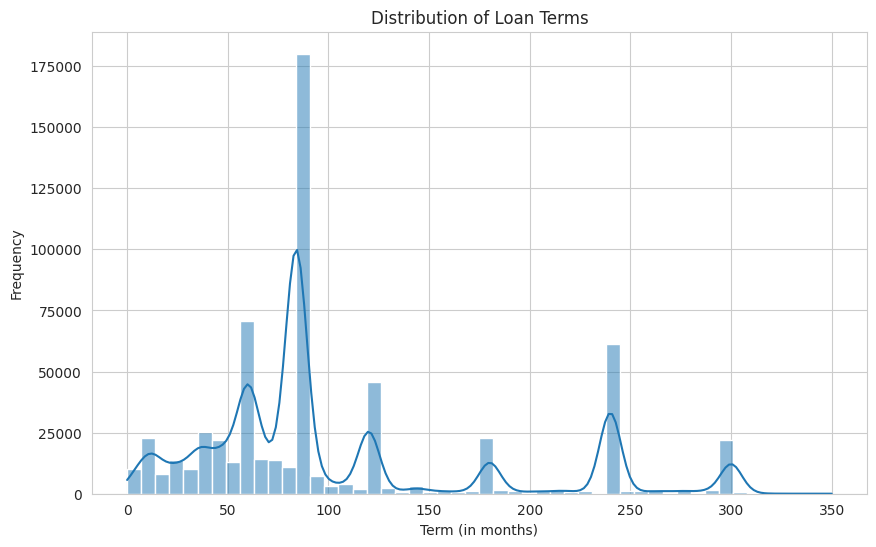

In [ ]:
data = data[data['Term'] <= 350]

# we plot it now
plt.figure(figsize=(10, 6))
sns.histplot(data['Term'], bins=50, kde=True)
plt.title('Distribution of Loan Terms')
plt.xlabel('Term (in months)')
plt.ylabel('Frequency')
plt.show()

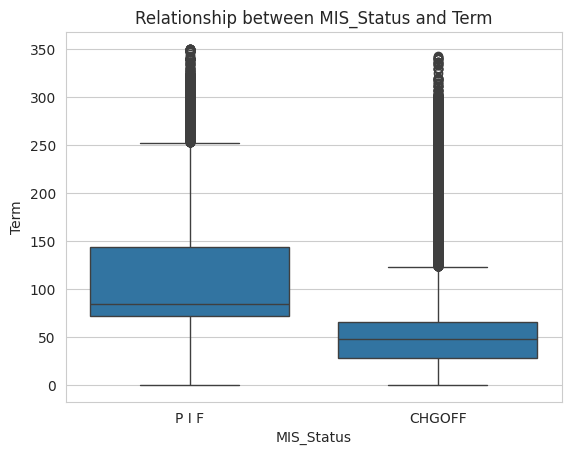

In [ ]:
# we now check the relationship between 'Term' and 'MIS_Status'
sns.boxplot(x='MIS_Status', y='Term', data=data)
plt.title('Relationship between MIS_Status and Term')
plt.show()

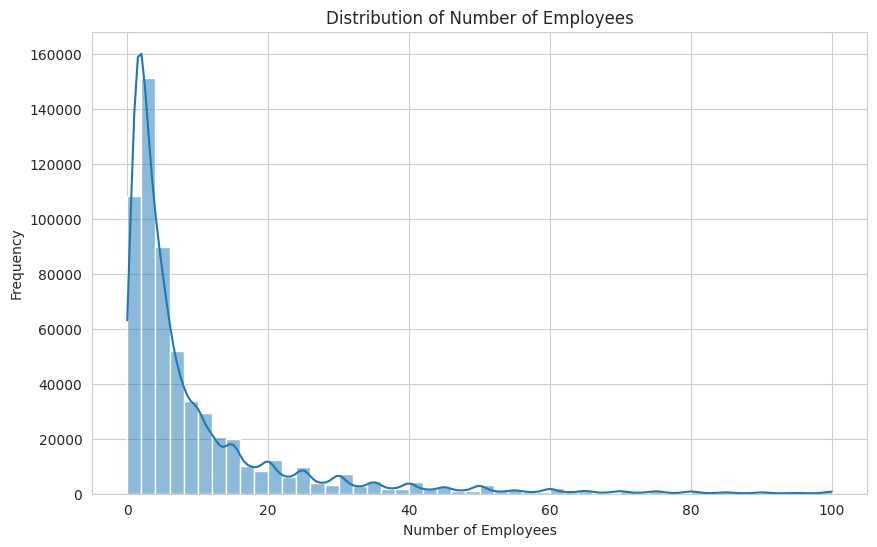

In [ ]:
data = data[data['NoEmp'] <= 100]

# we plot it again now
plt.figure(figsize=(10, 6))
sns.histplot(data['NoEmp'], bins=50, kde=True)
plt.title('Distribution of Number of Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Frequency')
plt.show()

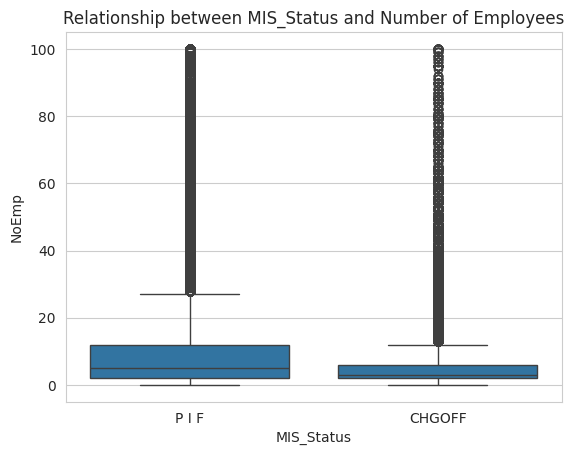

In [ ]:
#check the relationship between "MIS_Status" and "Noemp"
sns.boxplot(x='MIS_Status', y='NoEmp', data=data)
plt.title('Relationship between MIS_Status and Number of Employees')
plt.show()

we cannot give out any assumptions from this boxplot because the median values are close

The number of jobs created doesn't clearly differentiate between PIF and CHGOFF, as both show similar outlier patterns.

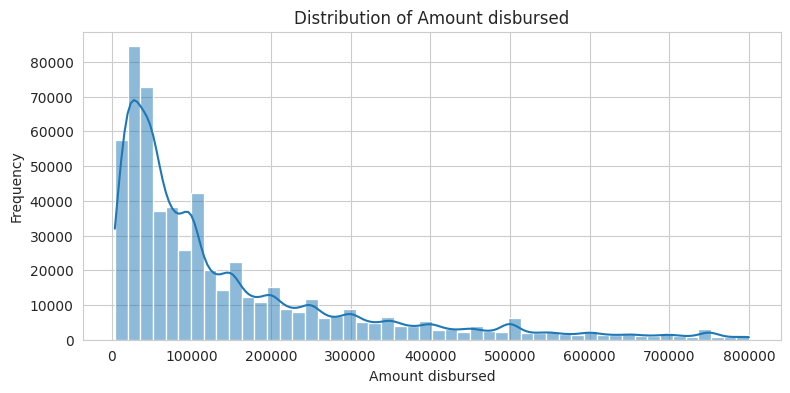

In [ ]:
# Plot the distribution of the 'Disbursement Gross'.

data = data[data['DisbursementGross'] <= 800000]

plt.figure(figsize=(9, 4))
sns.histplot(data['DisbursementGross'], bins=50, kde=True)
plt.title('Distribution of Amount disbursed')
plt.xlabel('Amount disbursed')
plt.ylabel('Frequency')
plt.show()




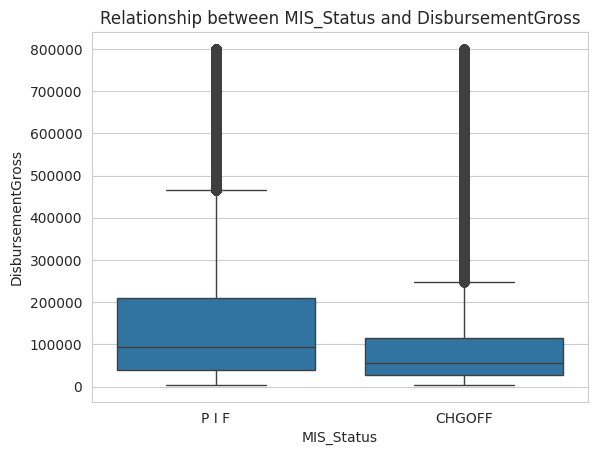

In [ ]:
# Check the replationship between MIS_Status and "DisbursementGross"
sns.boxplot(x='MIS_Status', y='DisbursementGross', data=data)
plt.title('Relationship between MIS_Status and DisbursementGross')
plt.show()

Loans with higher disbursements are more likely to be paid in full, while those with lower disbursements tend to be charged off.

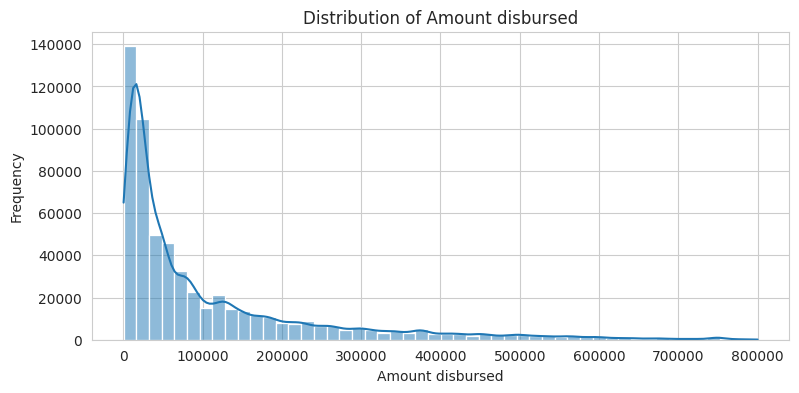

In [ ]:
# plot the distribution of the 'SBA_Appv' .

data = data[data['SBA_Appv'] <= 800000]
plt.figure(figsize=(9, 4))
sns.histplot(data['SBA_Appv'], bins=50, kde=True)
plt.title('Distribution of Amount disbursed')
plt.xlabel('Amount disbursed')
plt.ylabel('Frequency')
plt.show()

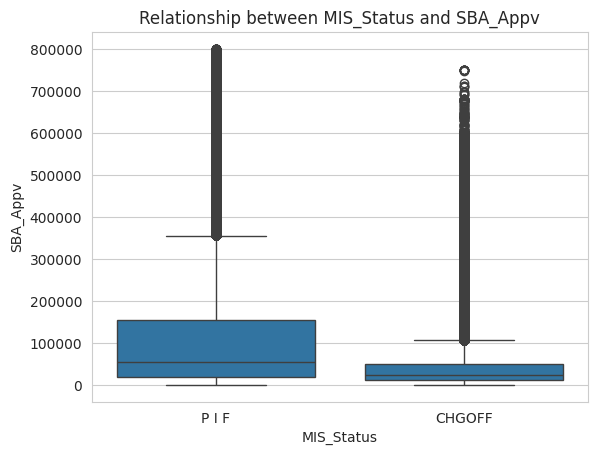

In [ ]:
# check the replationship between MIS_Status and "DisbursementGross"
sns.boxplot(x='MIS_Status', y='SBA_Appv', data=data)
plt.title('Relationship between MIS_Status and SBA_Appv')
plt.show()

It can be seen that companies with higher SBA’s guaranteed amount of approved loan are likely to pay the amount in full.


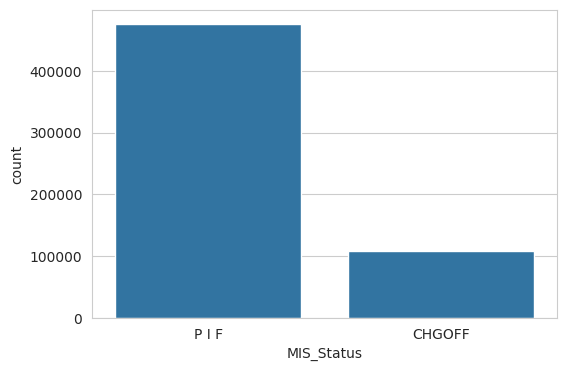

In [ ]:
# lets check the distribution of our label
plt.figure(figsize=(6,4))
sns.countplot(data = data, x = 'MIS_Status')
plt.show()

**Lets plot the count of 'State' column**

<ipython-input-151-a9f039fe0531>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='State', palette='viridis')


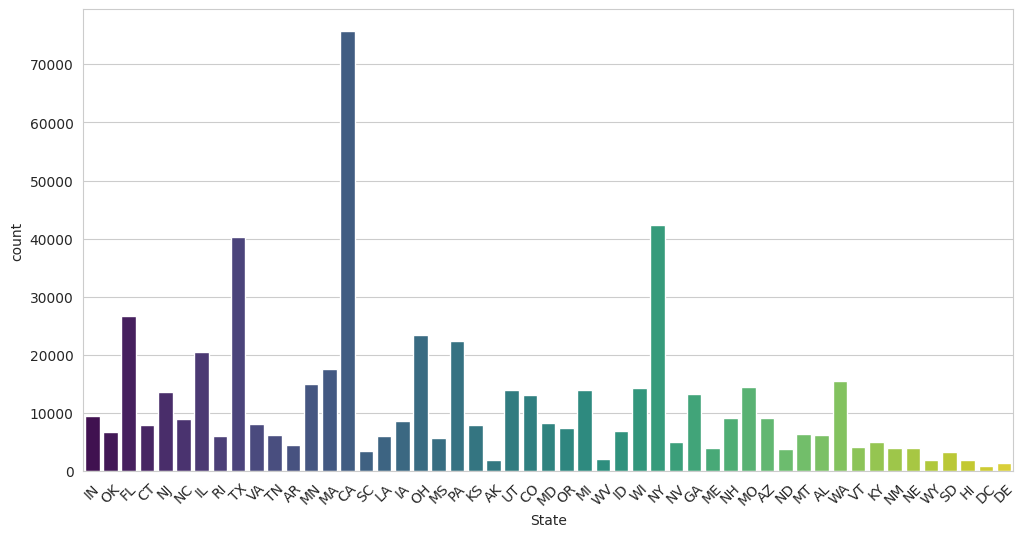

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(data=data, x='State', palette='viridis')
plt.xticks(rotation=45)
plt.show()


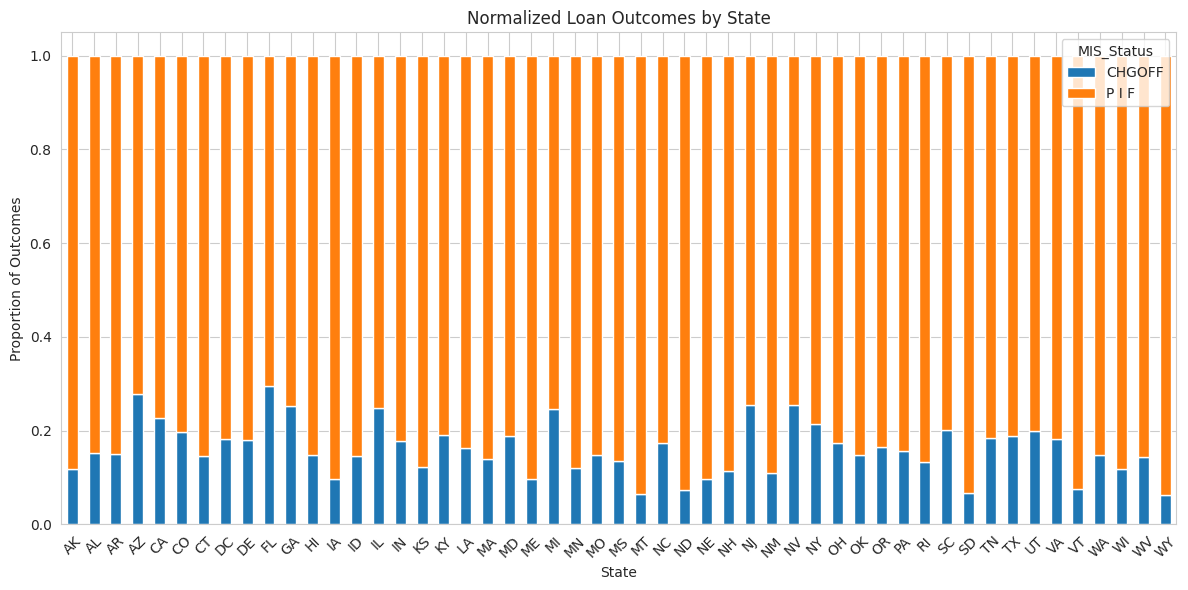

In [ ]:
crosstab = pd.crosstab(data['State'], data['MIS_Status'], normalize='index')

crosstab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Normalized Loan Outcomes by State')
plt.xlabel('State')
plt.ylabel('Proportion of Outcomes')
plt.xticks(rotation=45)
plt.legend(title='MIS_Status')
plt.tight_layout()
plt.show()

Arizona, Florida, New Jersey, and Nevada have higher rates of charged-off loans compared to other states.

**Lets plot the count of the 'BankState' column**

<ipython-input-153-823b24bd2c1b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x = 'BankState',  palette='viridis')


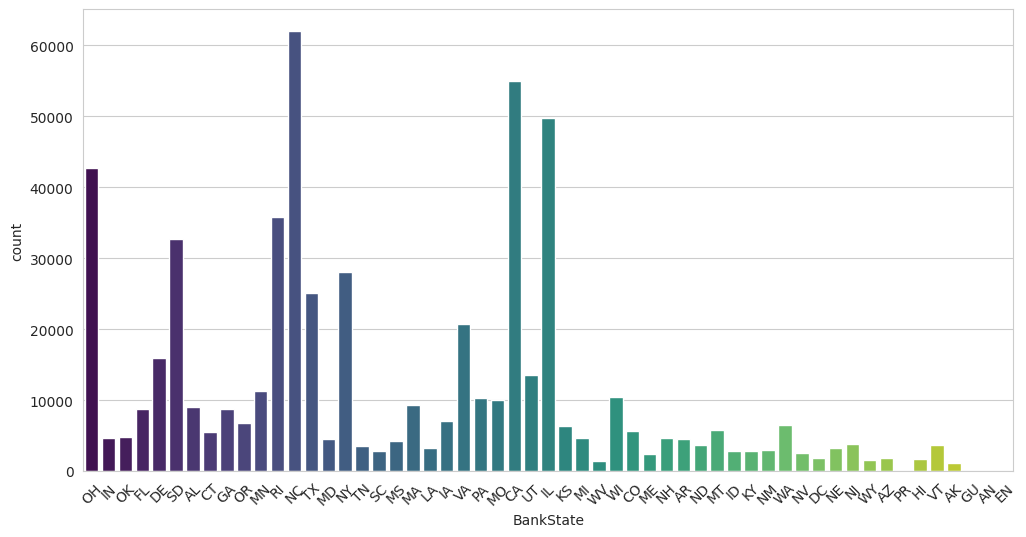

In [ ]:
# lets plot the count of the 'BankState'
plt.figure(figsize=(12,6))
sns.countplot(data = data, x = 'BankState',  palette='viridis')
plt.xticks(rotation=45)
plt.show()

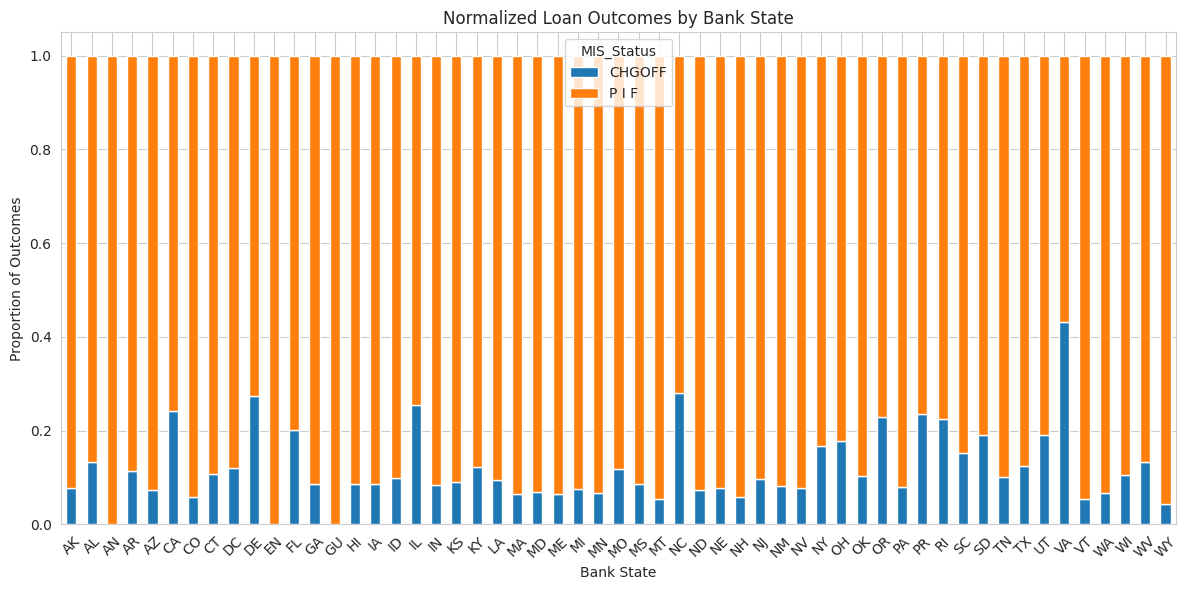

In [ ]:
bankstate_crosstab = pd.crosstab(data['BankState'], data['MIS_Status'])

bankstate_crosstab_normalized = bankstate_crosstab.div(bankstate_crosstab.sum(axis=1), axis=0)

bankstate_crosstab_normalized.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Normalized Loan Outcomes by Bank State')
plt.xlabel('Bank State')
plt.ylabel('Proportion of Outcomes')
plt.xticks(rotation=45)
plt.legend(title='MIS_Status')
plt.tight_layout()
plt.show()

Banks from Virginia have a way higher proportion of 'CHGOFF' loans.


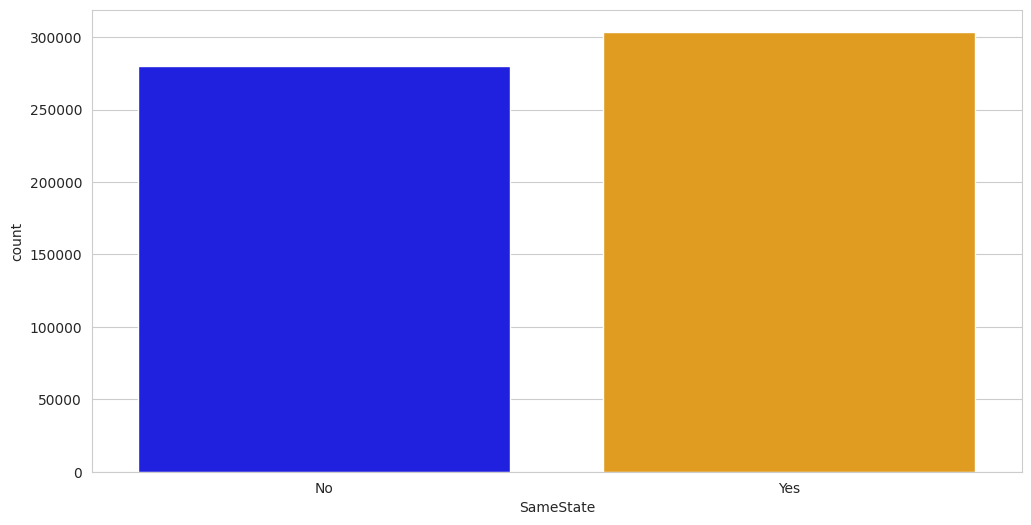

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom colors for 'No' and 'Yes'
custom_palette = {'No': 'blue', 'Yes': 'orange'}

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='SameState', hue='SameState', palette=custom_palette, legend=False)
plt.show()


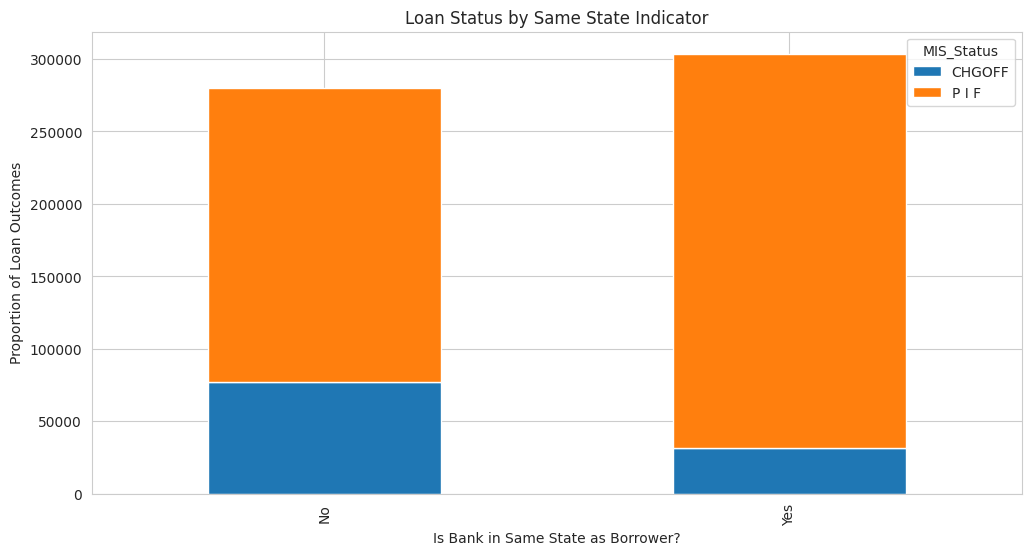

In [ ]:
same_state_crosstab = pd.crosstab(data['SameState'], data['MIS_Status'])
same_state_crosstab.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Loan Status by Same State Indicator')
plt.xlabel('Is Bank in Same State as Borrower?')
plt.ylabel('Proportion of Loan Outcomes')
plt.show()


The proportion of 'CHGOFF' loans appears to be higher when the bank and borrower are located in different states.

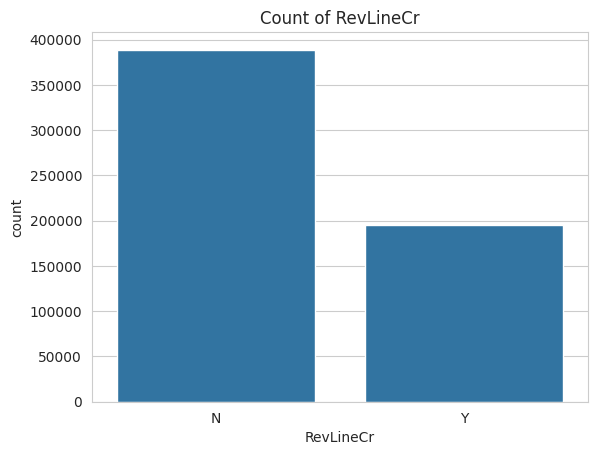

In [ ]:
sns.countplot(x='RevLineCr', data=data)
plt.title('Count of RevLineCr')
plt.show()

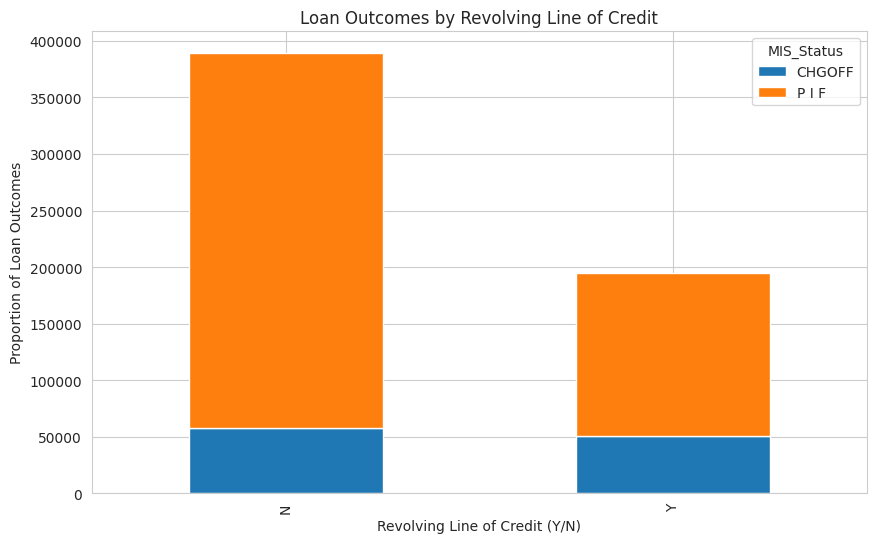

In [ ]:
revline_crosstab = pd.crosstab(data['RevLineCr'], data['MIS_Status'])
revline_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Loan Outcomes by Revolving Line of Credit')
plt.xlabel('Revolving Line of Credit (Y/N)')
plt.ylabel('Proportion of Loan Outcomes')
plt.show()

Loans with a revolving line of credit are more likely to be charged off compared to other types of loans.

**Lets plot the count of the 'IsFranchise' column**

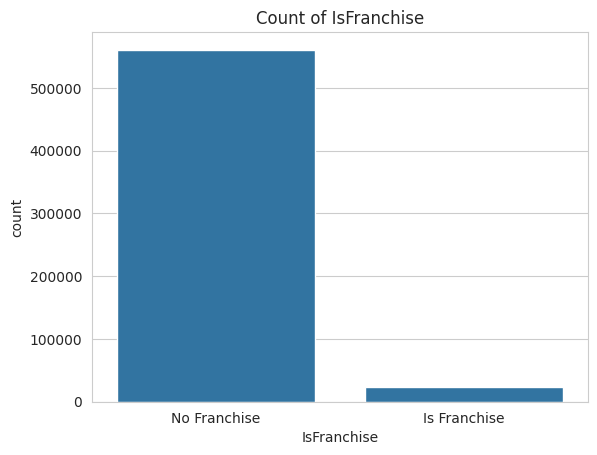

In [ ]:
sns.countplot(x='IsFranchise', data=data)
plt.title('Count of IsFranchise')
plt.show()

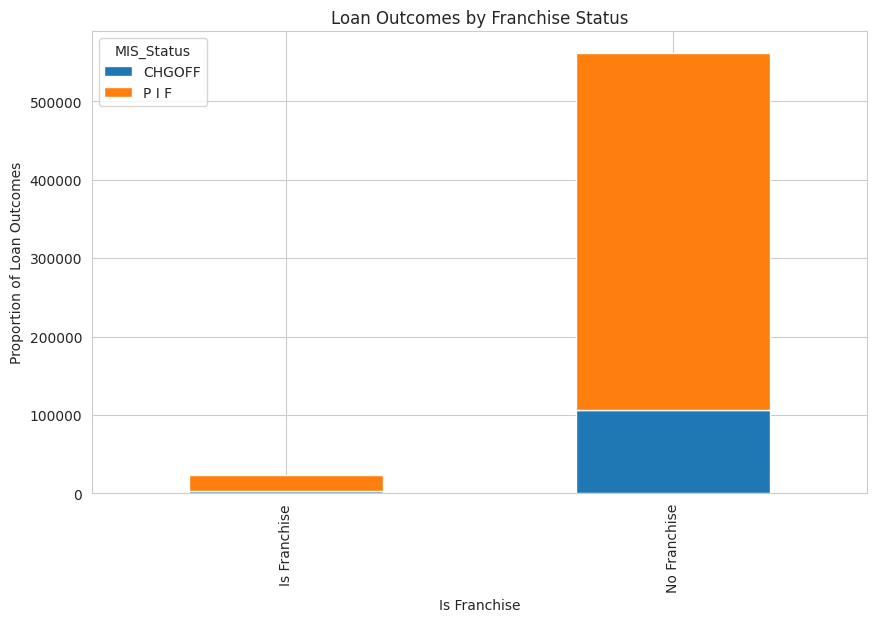

In [ ]:
franchise_crosstab = pd.crosstab(data['IsFranchise'], data['MIS_Status'])
franchise_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Loan Outcomes by Franchise Status')
plt.xlabel('Is Franchise')
plt.ylabel('Proportion of Loan Outcomes')
plt.show()

Loans that are not Franchise have a much higher risk of 'CHGOFF'.


## **Bivariate Analysis**

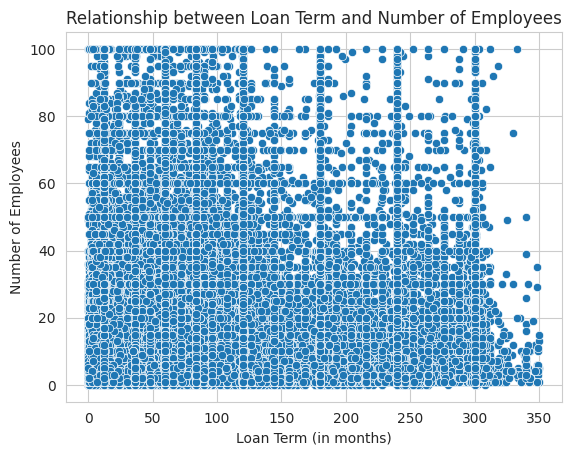

In [ ]:
# Term vs. NoEmp
sns.scatterplot(x='Term', y='NoEmp', data=data)
plt.title('Relationship between Loan Term and Number of Employees')
plt.xlabel('Loan Term (in months)')
plt.ylabel('Number of Employees')
plt.show()

In [ ]:
data['Term'].corr(data['NoEmp'])

# correlation analysis
# 1 = perfect +ve linear relationship
# -1 = perfect -ve linear relationship
# 0 = no linear relationship

0.19660383459600314

weak relationship between loan term and the number of employees

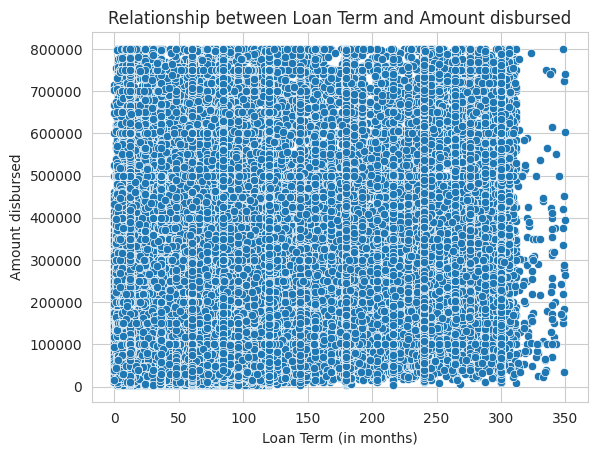

In [ ]:
# Term vs. DisbursementGross
sns.scatterplot(x='Term', y='DisbursementGross', data=data)
plt.title('Relationship between Loan Term and Amount disbursed')
plt.xlabel('Loan Term (in months)')
plt.ylabel('Amount disbursed')
plt.show()

In [ ]:
data['Term'].corr(data['DisbursementGross'])

0.4774005103476905

Loan Term and Amount disbursed are related


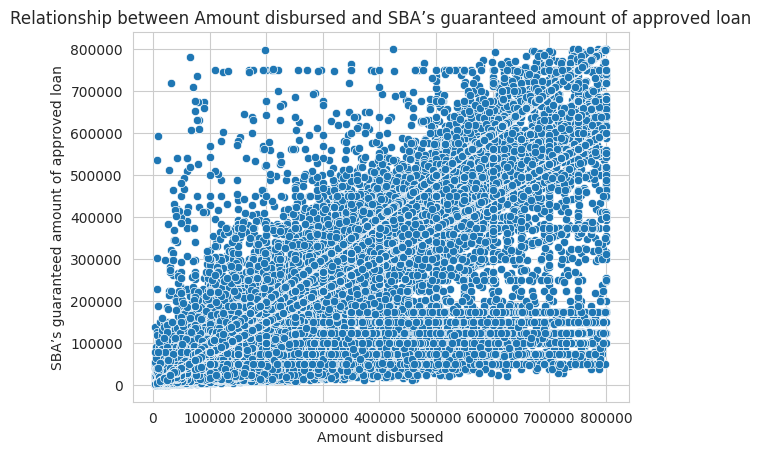

In [ ]:
# DisbursementGross vs. SBA_Appv
sns.scatterplot(x='DisbursementGross', y='SBA_Appv', data=data)
plt.title('Relationship between Amount disbursed and SBA’s guaranteed amount of approved loan')
plt.xlabel('Amount disbursed')
plt.ylabel('SBA’s guaranteed amount of approved loan')
plt.show()

both DisbursementGross and SBA_Appv are strongly related


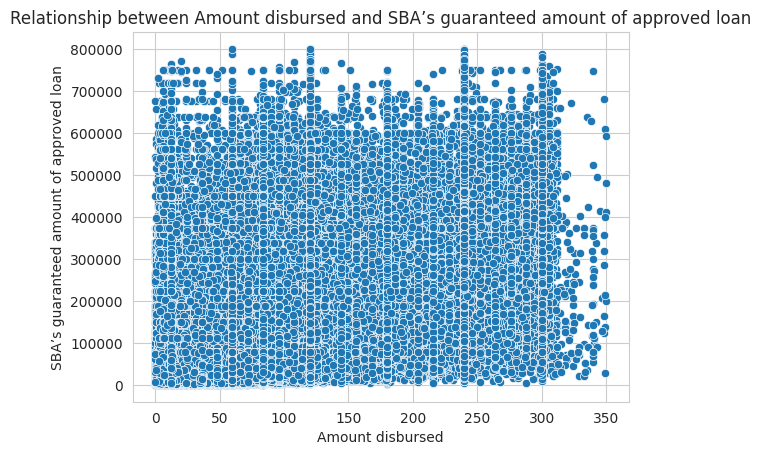

In [ ]:
# DisbursementGross vs. SBA_Appv
sns.scatterplot(x='Term', y='SBA_Appv', data=data)
plt.title('Relationship between Amount disbursed and SBA’s guaranteed amount of approved loan')
plt.xlabel('Amount disbursed')
plt.ylabel('SBA’s guaranteed amount of approved loan')
plt.show()

## **Modeling the Data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 583959 entries, 0 to 899163
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   State              583959 non-null  object 
 1   BankState          583959 non-null  object 
 2   Term               583959 non-null  int64  
 3   NoEmp              583959 non-null  int64  
 4   NewExist           583959 non-null  object 
 5   CreateJob          583959 non-null  int64  
 6   RetainedJob        583959 non-null  int64  
 7   UrbanRural         583959 non-null  object 
 8   RevLineCr          583959 non-null  object 
 9   LowDoc             583959 non-null  object 
 10  DisbursementGross  583959 non-null  float64
 11  MIS_Status         583959 non-null  object 
 12  SBA_Appv           583959 non-null  float64
 13  Industry           583959 non-null  object 
 14  IsFranchise        583959 non-null  object 
 15  SameState          583959 non-null  object 
dtypes: floa

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Initialize the one-hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder to our categorical columns.
encoder.fit(data[['State', 'BankState', 'NewExist', 'UrbanRural', 'RevLineCr', 'LowDoc', 'Industry', 'IsFranchise', 'SameState']])

OneHotEncoder(handle_unknown='ignore')

In [ ]:
# lets fit the encoder to our categorical columns.

encoded_features = encoder.transform(data[['State', 'BankState', 'NewExist', 'UrbanRural', 'RevLineCr', 'LowDoc','Industry', 'IsFranchise', 'SameState']])
# transform the data into a sparse matrix with one-hot encoded variable

encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out())


In [ ]:
# we drop the old categorical columns
data = data.drop(['State', 'BankState', 'NewExist', 'UrbanRural', 'RevLineCr', 'LowDoc', 'Industry', 'IsFranchise', 'SameState'], axis=1)


In [ ]:
data = pd.concat([data.reset_index(drop=True), encoded_df], axis=1)


In [ ]:
data.head()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,MIS_Status,SBA_Appv,State_AK,State_AL,State_AR,...,Industry_RE/Rental/Lease,Industry_Retail_trade,Industry_Trans/Ware,Industry_Unknown,Industry_Utilities,Industry_Wholesale_trade,IsFranchise_Is Franchise,IsFranchise_No Franchise,SameState_No,SameState_Yes
0,84,4,0,0,60000.0,P I F,48000.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,60,2,0,0,40000.0,P I F,32000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,180,7,0,0,287000.0,P I F,215250.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,60,2,0,0,35000.0,P I F,28000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,240,14,7,7,229000.0,P I F,229000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
feature_matrix = data.drop('MIS_Status', axis = 1)
target = data['MIS_Status']

In [ ]:
# we split the dataset into training set and testing set

X_train, X_test, y_train, y_test = train_test_split(feature_matrix, target, random_state=42, test_size = 0.2)

In [ ]:
# we need to encode the labels into numeric values to avoid errors that arise from using non-numeric labels.

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

## **Feature Selection**

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# we use the chi2 function to compute the Chi-squared statistic between each feature of the dataset and the target variable.

selector = SelectKBest(chi2, k=10)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

## **Feature standardization**

Since models like SVM and Logistic Regression are sensitive to data scale, we use StandardScaler to normalize all features.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lg = LogisticRegression(class_weight = 'balanced')
model_lg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split data (ensure proper train-test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features (important for kNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the kNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred_knn = knn.predict(X_test)

# Evaluate
print("kNN Classification Report")
print(classification_report(y_test, y_pred_knn))

kNN Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Train the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred_knn = knn.predict(X_test)

# Evaluate
print("kNN Classification Report")
print(classification_report(y_test, y_pred_knn))
print("ROC-AUC:", roc_auc_score(y_test, knn.predict_proba(X_test), multi_class='ovr'))

kNN Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

ROC-AUC: 0.9933333333333333


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test), multi_class='ovr'))


Random Forest Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

ROC-AUC: 0.9933333333333333


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features (important for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Grid search for hyperparameters
param_grid = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}
logit = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=1000), param_grid, cv=5)
logit.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", logit.best_params_)

# Predict
y_pred_logit = logit.predict(X_test)

# Evaluate
print("Logistic Regression with Regularization - Classification Report")
print(classification_report(y_test, y_pred_logit))

# Compute ROC-AUC for multi-class
try:
    roc_auc = roc_auc_score(y_test, logit.predict_proba(X_test), multi_class='ovr')
    print("ROC-AUC:", roc_auc)
except ValueError as e:
    print(f"ROC-AUC Error: {e}. Ensure y_test has multiple classes for ROC-AUC.")


Best Parameters: {'C': 10, 'penalty': 'l1'}
Logistic Regression with Regularization - Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

ROC-AUC: 0.9933333333333333


In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define class weights
class_weight = {0: 1, 1: 1, 2: 1.5}  # Adjust these values as needed

# ***Convert target variable to one-hot encoding***
y_train_encoded = to_categorical(y_train, num_classes=3)
#y_test_encoded  = to_categorical(y_test, num_classes=3) # You will likely need this for evaluation later

# Build the model
nn = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # For multiclass
])

# Compile the model
nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with class weights
nn.fit(X_train, y_train_encoded, validation_data=(X_train, y_train_encoded), epochs=40, batch_size=32, verbose=1, class_weight=class_weight)

# Predict and evaluate
y_pred_nn = nn.predict(X_test)
y_pred_nn = np.argmax(y_pred_nn, axis=1) #Get class labels from predictions

from sklearn.metrics import classification_report
print("Neural Network Classification Report")
print(classification_report(y_test, y_pred_nn))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 234ms/step - accuracy: 0.4385 - loss: 1.2427 - val_accuracy: 0.5750 - val_loss: 1.0165
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5925 - loss: 1.1532 - val_accuracy: 0.6583 - val_loss: 0.9366
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6790 - loss: 1.0621 - val_accuracy: 0.6667 - val_loss: 0.8647
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6740 - loss: 0.9687 - val_accuracy: 0.6750 - val_loss: 0.8003
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6765 - loss: 0.9195 - val_accuracy: 0.6917 - val_loss: 0.7433
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7200 - loss: 0.8263 - val_accuracy: 0.7250 - val_loss: 0.6910
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7594 - loss: 0.8010 - val_accuracy: 0.7833 - val_loss: 0.6418
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7508 - loss: 0.7505 - val_accuracy: 0.7917 - val_loss: 0.5955

In [ ]:
test_loss, test_accuracy = nn.evaluate(X_test, to_categorical(y_test, num_classes=3), verbose=0)

print(f"Neural Network Test Accuracy: {test_accuracy * 100:.4f}%")

Neural Network Test Accuracy: 93.3333%


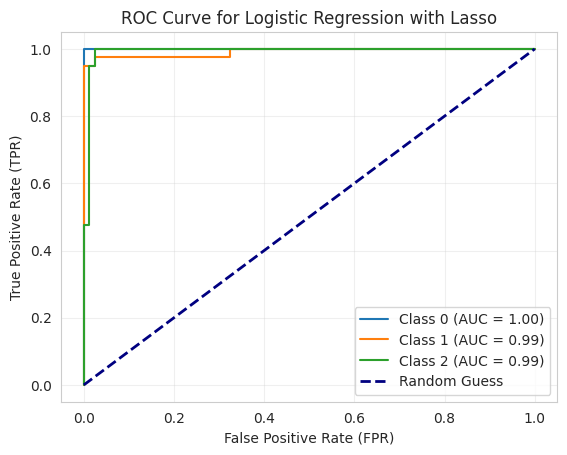


ROC-AUC Results:
Class 0 AUC: 100.00%
Class 1 AUC: 99.13%
Class 2 AUC: 99.28%


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize  # Import for multiclass handling


# Obtain the predicted probabilities
y_proba_logit = logit.predict_proba(X_train)

# Handle multiclass scenario
if len(np.unique(y_train)) > 2:  # Check if y_train is multiclass
    y_train_bin = label_binarize(y_train, classes=np.unique(y_train))  # Binarize

    # Initialize a list to store AUC values
    auc_values = []

    for i in range(y_train_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_train_bin[:, i], y_proba_logit[:, i])  # ROC for each class
        roc_auc = auc(fpr, tpr)
        auc_values.append(roc_auc) # Store calculated AUC value
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')  # Plot individual curves
else:
    # Binary classification
    fpr, tpr, _ = roc_curve(y_train, y_proba_logit[:, 1])  # Use probabilities for positive class
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')


# The rest of the plotting code remains the same
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression with Lasso')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# Print results after the graph
print("\nROC-AUC Results:")
if len(np.unique(y_train)) > 2:  # Multiclass case
    # Iterate over the calculated and stored AUC values
    for i, auc_val in enumerate(auc_values):
        print(f"Class {i} AUC: {auc_val*100:.2f}%")
else:  # Binary case
    print(f"Binary AUC: {roc_auc*100:.2f}%") # Print the calculated roc_auc

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Classification Report (Test Data)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

ROC-AUC (Test Data): 0.9499999999999998


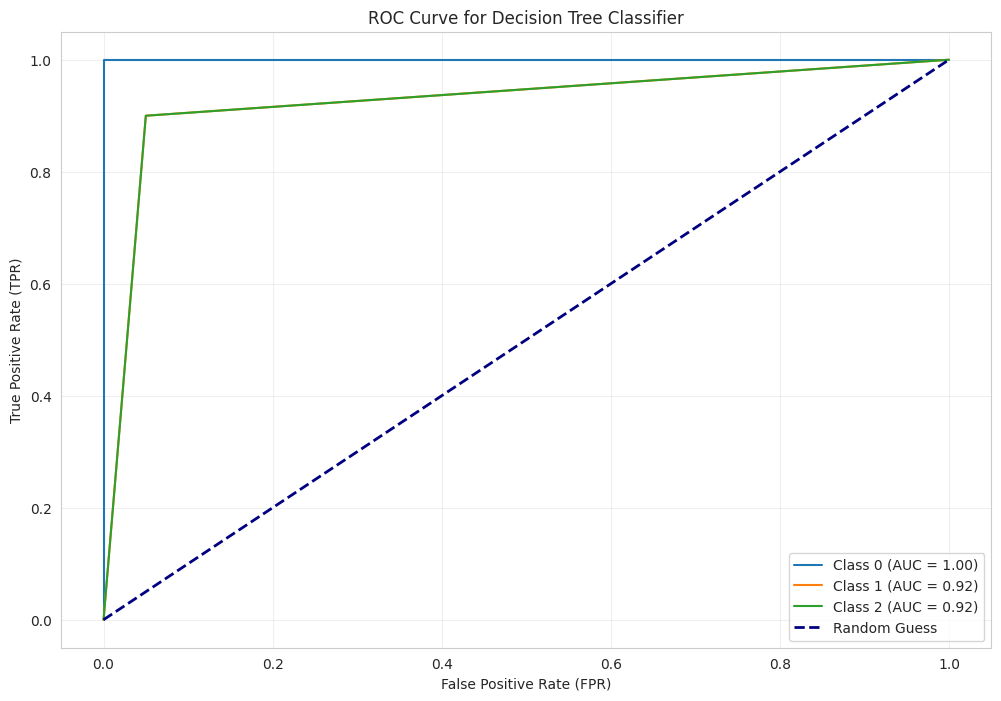


ROC-AUC Results:
Class 0 AUC: 100.00%
Class 1 AUC: 99.13%
Class 2 AUC: 99.28%


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Grid search for hyperparameters
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate and fit the Decision Tree model using GridSearchCV
dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
dt.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
print(f"Best Parameters: {dt.best_params_}")

# Predict on test data
y_pred_dt = dt.predict(X_test)

# Evaluate on test data
print("Decision Tree Classification Report (Test Data)")
print(classification_report(y_test, y_pred_dt))

# Compute ROC-AUC on test data
try:
    y_proba_dt = dt.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, y_proba_dt, multi_class='ovr')
    print("ROC-AUC (Test Data):", roc_auc)
except ValueError as e:
    print(f"ROC-AUC Error: {e}. Ensure y_test has multiple classes for ROC-AUC.")

# Plotting ROC curve for test data
plt.figure(figsize=(12, 8))
if len(np.unique(y_test)) > 2:
    # Multiclass scenario
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    for i in range(y_test_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_dt[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
else:
    # Binary classification
    fpr, tpr, _ = roc_curve(y_test, y_proba_dt[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

# Plotting additional details
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# Print results after the graph
print("\nROC-AUC Results:")
if len(np.unique(y_train)) > 2:  # Multiclass case
    # Iterate over the calculated and stored AUC values
    for i, auc_val in enumerate(auc_values):
        print(f"Class {i} AUC: {auc_val*100:.2f}%")
else:  # Binary case
    print(f"Binary AUC: {roc_auc*100:.2f}%") # Print the calculated roc_auc

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import numpy as np

# Initialize and train Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

# Define the cost matrix (adjust profit/loss values as needed)
cost_matrix = {
    0: 100,   # Profit for class 0
    1: 50,    # Profit for class 1
    2: -20    # Loss for class 2 (negative profit)
}

# Define custom misclassification penalties
# This defines how much penalty to apply when a prediction is wrong
misclassification_penalty = {
    0: 1.0,   # No penalty for correct prediction of Class 0
    1: 0.5,   # Half penalty for misclassification of Class 1
    2: 1.5    # Full penalty for misclassification of Class 2 (higher penalty)
}

# Calculate cost-sensitive profit for Decision Tree
total_profit_dt = 0
for true_label, predicted_label in zip(y_test, y_pred_dt):
    if true_label == predicted_label:
        total_profit_dt += cost_matrix[predicted_label]  # Correct prediction adds full profit
    else:
        total_profit_dt += cost_matrix[predicted_label] * misclassification_penalty[predicted_label]  # Apply the misclassification penalty

# Print the total cost-sensitive profit for Decision Tree
print(f"Total Cost-Sensitive Profit (Decision Tree): {total_profit_dt:.2f}")




Total Cost-Sensitive Profit (Decision Tree): 1265.00
